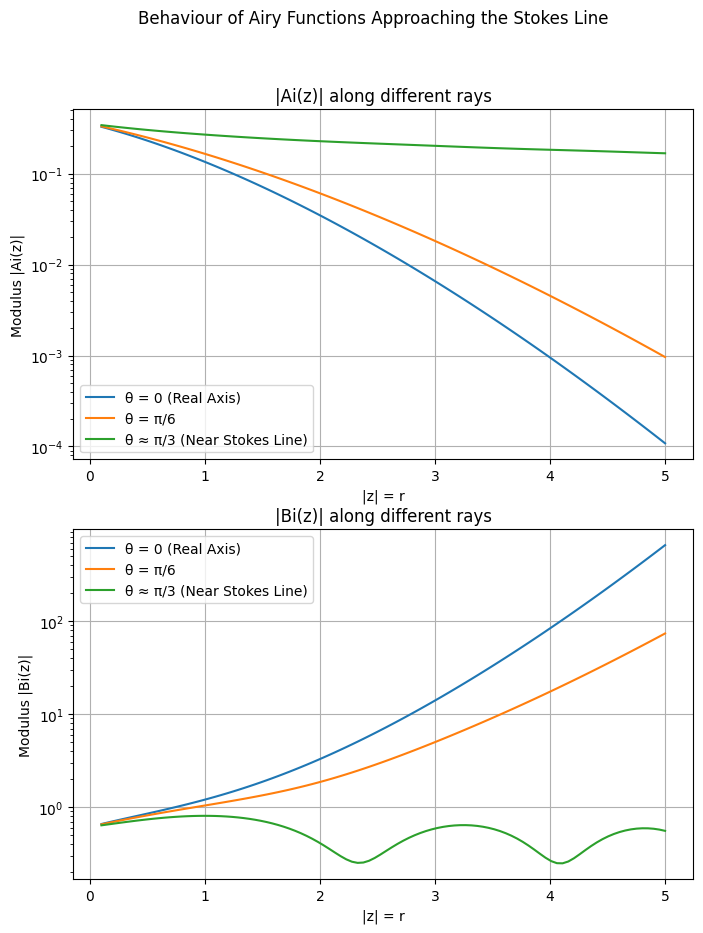

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma
from scipy.integrate import solve_ivp

def solve_bi(z_target):
    ALPHA = 1/(3**(2/3)*gamma(2/3)); BETA = 1/(3**(1/3)*gamma(1/3))
    if z_target == 0: return np.sqrt(3) * ALPHA
    r, theta = np.abs(z_target), np.angle(z_target)
    S0 = [np.sqrt(3)*ALPHA, 0, np.sqrt(3)*BETA*np.cos(theta), np.sqrt(3)*BETA*np.sin(theta)]
    def ode_sys(t, S, theta):
        u, v, p, q = S; c3, s3 = np.cos(3*theta), np.sin(3*theta)
        return [p, q, t*(u*c3 - v*s3), t*(u*s3 + v*c3)]
    sol = solve_ivp(ode_sys, [0, r], S0, args=(theta,), rtol=1e-9, atol=1e-9)
    return sol.y[0,-1] + 1j*sol.y[1,-1]

def solve_ai_backwards(z, a=10.0):
    ALPHA = 1/(3**(2/3)*gamma(2/3))
    if z == 0: return ALPHA
    r, theta = np.abs(z), np.angle(z)
    if a <= r: a = r + 5
    z_start = a * np.exp(1j * theta)
    y_start = 0.5 * (1/np.sqrt(np.pi)) * (z_start**(-0.25)) * np.exp(-(2/3)*z_start**1.5)
    y_prime_start = -z_start**0.5 * y_start
    dYdt_start = y_prime_start * np.exp(1j * theta)
    S0 = [y_start.real, y_start.imag, dYdt_start.real, dYdt_start.imag]
    def ode_sys(t, S, theta):
        u, v, p, q = S; c3, s3 = np.cos(3*theta), np.sin(3*theta)
        return [p, q, t*(u*c3 - v*s3), t*(u*s3 + v*c3)]
    sol = solve_ivp(ode_sys, [a,r], S0, args=(theta,), rtol=1e-13, atol=1e-13)
    return sol.y[0,-1] + 1j*sol.y[1,-1]

r_values = np.linspace(0.1, 5, 100)
thetas = {
    "θ = 0 (Real Axis)": 0,
    "θ = π/6": np.pi/6,
    "θ ≈ π/3 (Near Stokes Line)": np.pi/3 - 0.01
}

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))
fig.suptitle('Behaviour of Airy Functions Approaching the Stokes Line')

for label, theta in thetas.items():
    z_ray = r_values * np.exp(1j * theta)
    ai_vals = np.array([solve_ai_backwards(z) for z in z_ray])
    bi_vals = np.array([solve_bi(z) for z in z_ray])

    ax1.plot(r_values, np.abs(ai_vals), label=label)
    ax2.plot(r_values, np.abs(bi_vals), label=label)

ax1.set_title('|Ai(z)| along different rays')
ax1.set_xlabel('|z| = r')
ax1.set_ylabel('Modulus |Ai(z)|')
ax1.set_yscale('log')
ax1.legend()
ax1.grid(True)

ax2.set_title('|Bi(z)| along different rays')
ax2.set_xlabel('|z| = r')
ax2.set_ylabel('Modulus |Bi(z)|')
ax2.set_yscale('log')
ax2.legend()
ax2.grid(True)

plt.show()

*   For $Ai(z)$: On the real axis, the function exhibits rapid, monotonic exponential decay. As $\theta$ increases, the decay becomes less and less rapid. Near the Stokes line we see a slow algebraic decay.

*   For $Bi(z)$: On the real axis the function shows rapid, monotonic exponential growth. As $\theta$ increases, similarly the growth becomes less rapid. Near the Stokes line function's modulus becomes oscillatory.

A Stokes line occurs where the real part of the exponent in the asymptotic forms $\exp(\pm(2/3)z^{3/2})$ is zero, causing the behavior to switch from exponential to oscillatory. Let $z = re^{i\theta}$. The condition is
\begin{equation}
    \Re(\pm(2/3)z^{3/2}) = \pm(2/3)r^{3/2}\cos(3\theta/2) = 0.
\end{equation}
This requires $\cos(3\theta/2) = 0$ which implies $\theta = \pm\pi/3$ (already seen) or $\theta = \pi$. In the region $\pi/3 < θ < \pi$, we have $\cos(3\theta/2) < 0$. Analysing the exponent term, $Ai(z)$ should become the exponentially growing solution, whereas $Bi(z)$ should become the exponentially decaying solution. This means we need to integrate $Ai(z)$ forwards and $Bi(z)$ backwards.


---

The asymptotic form for any solution $y(z)$ of the Airy equation is $y(z) \sim AF(z) + BG(z)$. The constants $A$ and $B$ depend on the initial conditions and also the region of the complex plane. The Stokes lines at $\arg{z} = \pm\pi/3$ and $\arg{z} = \pi$ divide the plane into three key regions.

*   Region 1: $|\arg{z}| < \pi/3$.
    
    In this region, $G(z)$ is exponentially growing (dominant), and $F(z)$ is exponentially decaying (subdominant). This means that $Ai(z)$ is exponentialaly decaying since $A=1/2$ and $B=0$ and $Bi(z)$ is exponentially growing since $A$ is negligible and $B=1.
    *   The ratio $Ai(z) / F(z)$ tends towards $1/2$ as $|z| \to \infty$.
    *   The ratio $Bi(z) / G(z)$ tends towards $1$ as $|z| \to \infty$.
    
*   Region 2: $\pi/3 < \arg{z} < \pi$.

    The roles have swapped. $F(z)$ is now exponentially growing (dominant), and $G(z)$ is exponentially decaying (subdominant). Since $Ai(z)$ is now growing, it must have acquired a component of the dominant term $F(z)$. The standard connection formula shows $A = 1/2$ and $B = i/2$. Similarly, $Bi(z)$ is now decaying in this region with $A = 1/2$ and $B = -i/2$.

*   Region 3: $-\pi < \arg{z} < -\pi/3$.

    This region is symmetric to Region 2. $F(z)$ is dominant, and $G(z)$ is subdominant. Since Ai(z) and Bi(z) are defined by real coefficients, their values for conjugate inputs are conjugates. For Ai(z), we have $A = 1/2$ and $B = -i/2$ while for $Bi(z)$, we have $A = 1/2$ and $B = i/2$.

On the Stokes lines themselves, the situation is different and more subtle. The real part of the exponent in both $F(z)$ and $G(z)$ is zero. This means that $|F(z)|$ and $|G(z)|$ have the same asymptotic magnitude $|z|^(-1/4)$. Neither function is dominant over the other. To accurately describe the function on a Stokes line, we need the full expression in the asymptotic expansion.

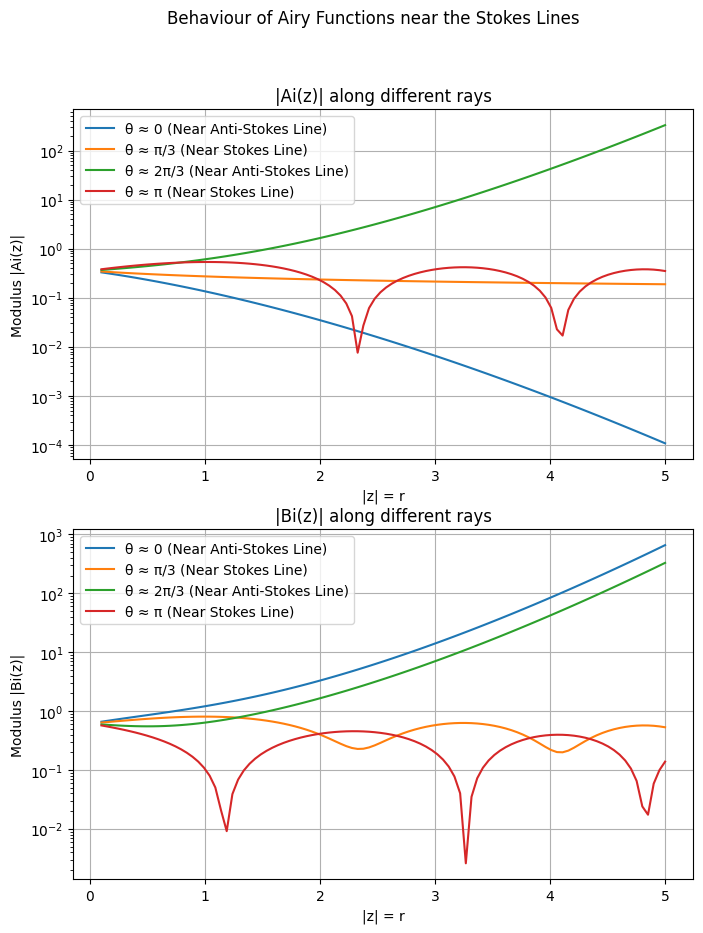

In [70]:
from scipy.special import airy
r_values = np.linspace(0.1, 5, 100)
thetas = {
    "θ ≈ 0 (Near Anti-Stokes Line)": 0,
    "θ ≈ π/3 (Near Stokes Line)": np.pi/3,
    "θ ≈ 2π/3 (Near Anti-Stokes Line)": 2*np.pi/3,
    "θ ≈ π (Near Stokes Line)": np.pi
}

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))
fig.suptitle('Behaviour of Airy Functions near the Stokes Lines')

for label, theta in thetas.items():
    z_ray = r_values * np.exp(1j * theta)
    ai_vals = np.array([airy(z)[0] for z in z_ray])
    bi_vals = np.array([airy(z)[2] for z in z_ray])

    ax1.plot(r_values, np.abs(ai_vals), label=label)
    ax2.plot(r_values, np.abs(bi_vals), label=label)

ax1.set_title('|Ai(z)| along different rays')
ax1.set_xlabel('|z| = r')
ax1.set_ylabel('Modulus |Ai(z)|')
ax1.set_yscale('log')
ax1.legend()
ax1.grid(True)

ax2.set_title('|Bi(z)| along different rays')
ax2.set_xlabel('|z| = r')
ax2.set_ylabel('Modulus |Bi(z)|')
ax2.set_yscale('log')
ax2.legend()
ax2.grid(True)

plt.show()